<a href="https://colab.research.google.com/github/mmrmas/DL101/blob/main/Week_2_Predictive_Analytics/02_Predictive_Analytics_Coursebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻Welcome to Week 2 of the DL101 Bootcamp 

## A Dive Into Tabular Data Deep Learning

As you covered Computer Vision applications in the previous week, you have learned some fundamental concepts in Machine Learning like classification tasks, datasets and labels. We will take from here and  expand your knowledge to the most impactful machine learning applications for business, which is Tabular Data.

> Tabular means your data is *structured* in tables, e.g in spreadsheets, CSVs and SQL databases.



## 📕 Learning Objectives



* Go through the Machine Learning Workflow for Tabular Data and learn how to train classification and regression models.
* Learn about data types and explore powerful data transformation techniques.
* Train Deep Learning models and interpet the results

## 📅 Weekly Progress 

|Week | Content | Learning Objectives|
|:--- |:--- | :--- |
|0 | Warm Up & Theory | Get to know more about your classmates, the mentors, and learn about the fundamental concepts of Machine Learning, how it works, its limitations, and potential.
|1 |Computer Vision | Dive into Computer Vision, and learn about how machines are able to derive insights and make predictions from visual data. Build your own computer vision application, by gathering your own images and train your own model.**
|**2** |**Tabular Data** | **Comprehend how AI & Machine Learning can be applied to Tabular Data such as sales, marketing, or customer data, and learn how to deduce actionable insights for the future, and build your own classification or regression application.**
|3 |Recommender Systems | Learn more about Recommender Systems, and understand how TikTok, Youtube, and Netflix are able to recommend your next favorite piece of content. Choose a dataset to build your own model to predict and recommend.
|4 | Natural Language Processing (NLP) | Apply AI & Machine Learning to text, discover Language Models and go through the process of how an AI model is able to generate, summarize and classify text. Build your own NLP application to automatically generate movie reviews, or analyze sentiment.
|5 | Practical AI for you & Graduation | Jump into a 1:1 mentorship session with our AI experts to define an AI project that solves a pain point in your organization, personal project, or life in general. Research, gather feedback, write an article and pitch your project to the class. Successfully graduate from the Bootcamp and receive your AI certification.

## Libraries & Dependencies needed for Tabular Data 


We are going import lots libraries and dependies among which few should look quite familiar:

In [1]:
import sys
from IPython.display import clear_output
!pip install tornado==5.1.0
!pip install -Uqq pandas-profiling[notebook]==3.1.0
!pip install -Uqq pycaret
!jupyter nbextension enable --py widgetsnbextension

clear_output() #comment out to debug dependencies


^C


The following code below will help to display interactive visuals 

In [2]:
# Standard Library Imports
from pathlib import Path

# Installed packages
import pandas as pd
from ipywidgets import widgets

# Our package
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + ' forcelabels=true; }')

#Enable pycaret on Colab
from pycaret.utils import enable_colab
enable_colab()
%matplotlib inline



Colab mode enabled.


#Introduction to Tabular Modeling

## What is Tabular Modeling?

Tabular modeling takes data in the form of a table (like a spreadsheet or CSV).
Tabular data consists of 4 key elements that are described below. Make sure to carefully go through them as they serve as the foundation of what is to come in this chapter.

### Samples

**Samples** or **Observations** (marked in green in the screenshot below) are the rows of data in your tabular data. Every row contains a set of data points, and depending on the data set can represent one user profile, one transaction, one product etc.

In the image below, each sample shows the profile of one adult in the adult dataset.

### Features

**Features** or **Variables** (marked in red) are the columns of data in your tabular data. Each feature represents a measurable piece of data that can be used for analysis: Name, Age, Sex, Fare, and so on. Features are also sometimes referred to as “variables” or “attributes.” Depending on what you're trying to analyze, the features you include in your dataset can vary widely.

### Target
The **target** (marked in blue) is the variable that you want to predict in your tabular data. The target is usually the last column of the properly prepared tabular dataset.

### Dataset
The **dataset** is the combination of all samples, features and the target and the entire dataset including all data points and values.

<img src="https://github.com/unpackAI/DL101/raw/main/images/tab_Dataset%20explanation.png" alt="classification" width="1400"/>

**The objective is to predict the value of the target variable based on the values of the features variables.**

The target depends on the other variables in your study, and is thus called the *dependent* variable. The dependent variable is the *effect/outcome*.

The features are independent of other variables in your study, and are thus called the *independent* variables. The *independent* variables are the *cause*. 


> Note: Depending on your actual project objective, the target variable could be any of the feature variables in the dataset.

Having covered the key elements that build the foundation of tabular data, let's learn and explore what types of data are stored inside tabular data.

## Tabular Data Types

##Continous Data 

Continous (Numeric) Data is data which can be collected as a set of numbers within a range. 

 This can take the smooth form of temperature readings (23.5,9.3). Or, another form as a measurement such as house prices or as a count, like a number of residential properties in Shanghai or how many houses sold in the past year. 

As a result, continous data can be characterized by whole integers (10,6,204) or floating point decimal numbers (0.01,10.3,409.07). It is important to understand that Continuous data is **quantitative** and can be represented mathematically as a line. 

## Categorical Data
 
Categorical data have values that describe attributes or characteristics of a sample. These can include a hockey player’s position, team, or hometown. These don't exist as a number along a spectrum, but are still important. 

It is important to note that a number, like a phone number or postal code, is a categorical variable, and is not continous.

These attributes aren’t as straightforward to represent mathematically as continuous data is, but TabularPandas will help us with this process later. 



## Tabular Data Machine Learning Problems

> ML Tasks and ML Problems are interchangeable terms.

### Regression Problem

If you are trying to predict a *continuous* value, it means you work on a **regression** problem.

> Reminder: A *regression model* is one that attempts to predict one or more numeric quantities, such as a temperature or a location. It looks at the entire dataset, trains itself and finds patterns and features that impact the target variable. Based on that and its trained parameters it can produce educated predictions based on the data.

### Classification Problem

If you aim to build a tabular model, that predicts a *category*, it is a **classification** task. In this notebook, we will be focusing on a classification task.

> Reminder: A *classification model* is one that attempts to predict a "class", also called "category". That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat". Just like in a regression problem, it also considers the entire dataset and finds patterns in the data. The approach is similar, the output is different as it predicts one value among a set of pre-defined categories.

##Why do we apply AI to Tabular Data?

AI and Machine Learning helps us to process data into information to assist people to make better more data-driven decisions.

Data: Raw facts and figures

Information: News or knowledge received or given

Differences between Data and Information

*   **Facts** are processed, interpreted, and organized into **information**
*   In Computers **data** is the **input**, and **information** is the **output**
*   **Facts** are not useful on their own
*   **Information** reduces uncertainty

### Workflow for Building Tabular Models 

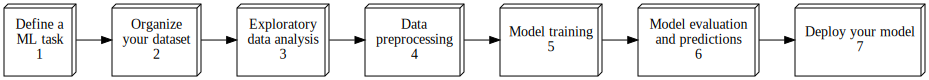

In [29]:
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="Define a \n ML task\n1"]
dataset[shape=box3d width=1 height=1 label="Organize \n your dataset\n2"]
eda[shape=box3d width=1 height=1 label="Exploratory \n data analysis\n3"]
preprocess[shape=box3d width=1 height=1 label="Data \n preprocessing\n4"]
train[shape=box3d width=1 height=1 label="Model training\n5"]
predict[shape=box3d width=1 height=1 label="Model evaluation \n and predictions\n6"]
deploy[shape=box3d width=1 height=1 label="Deploy your model\n7"]
problem->dataset->eda->preprocess->train->predict->deploy''')

As you just learned about Data Types, the two basic categories of Machine Learning Problems, we can now re-visit the Machine Learnig Workflow and apply it specifically to Tabular Modeling.

1. ***Define a ML task:*** 

Your goal in regards to Tabular Data would be to determine:

* Is the problem you will work on Classification or Regression?

* What features or independent variables are required to make an accurate prediction? 

* What observable and quantifiable performance metric you will pick? For example, in a classification problem we could use **accuracy** as a metric (we learned more about accuracy as a metric in the computer vision chapter) and in a regression problem we could use the **mean squared error** as a metric.

> The mean squared error (MSE) shows how accurate your predictions are in a regression problem. It does so by calculating the difference between your model’s predictions and the ground truth, square it, and average it out across the whole dataset. It tells you how close a regression line is to a set of points of your dataset.

2. ***Organize your dataset:*** 

For many tabular machine learning projects this is the most tedious and time consuming operation that can vary significantly from project to project. 
As our main objective is to learn how Machine Learning algorithms can help us with Tabular Data problems, we will provide you with prepared and already cleaned datasets. So for now we omit this step, but surely will get back to you when you will begin working on your individual machine learning project in one of our advanced Bootcamps.

Moreover, we will split the dataset into the training, validation, and test set. We will also define the dependent and independent variables as well as the, categorical, numerical, and ordinal data types for the model.

3. ***Exploratory Data Analysis:***

It's always good to learn about your dataset to see how all the independent features relate to each other and describe the target variable. Some features are fully correlated in the way they don't help model to learn any valuable relationships that determine the target variable hence some are redundant. Some features are not interactive, thus considered as noise, some might contain too many missing values etc. Knowing the limitations of your own dataset is a good start to improve it even before building any predictive model.

We will use a very cool tool that is called **Pandas Profiling** that provides us all the statistics about a dataset and effective explanatory plots to analyze. You don't need to do anymore a traditional exploratory data analysis and have the coding skills in Python and Pandas.

4. ***Data Preprocessing:***

It's normal that the original dataset can have many imperfections and redundant features (remember what features represent in a tabular dataset) that are irrelevant to predict the target variable. In some cases they can even negatively affect the model training. Thus data preprocessing techniques such as feature selection, feature extraction will make sure that your dataset is refined and ready to be fed into the model for training. 


5. ***Model Training:*** 

This is another exciting part that we are proud at unpackAI to teach you in this week. Traditionally tabular modeling has been a very time consuming process with requirements on deep understanding of various algorithms and skills on how to apply them and improve. If you google about machine learning algorithms you will be overwhelmed by number of existing ones and math used to explain them. The good thing that Machine Learning is evolved into engineering discipline rather than pure science with "only PhDs knowing what they are talking about" as before, so it has been automated and simplified. But still only few know that:). Automated Machine Learning is called AutoML, that enables us to explore many models in one run, pick the best one based on the performance (a metric) and fine-tune "all with just few clicks". Yes, machine learning experimentation is fun! 

6. ***Model evaluation and predictions:***

In order to further interpret the performance of the model we will employ interpretation techniques.And again we will use an AutoML functionality to display all relevant model evaluation graphs. It's important to understand the limitations of the model to make a good judgement of its behavior on unseen data. Model evaluation will be so smooth and loads of visuals, so you will love it!

7. ***Deploy your model***

The last step of tabular model building is to deploy your model for public access in order to demonstrate its performance as the web application for end users. Normally data products are encouraged to launch in **a controlled environment** as early as possible to test them against the *concept* and *data drifts*.  

>**Data drift**. The model was trained on a certain distribution of inputs, but this distribution changes over time. For example, a model may have learned to estimate demand for electricity from historical data, but climate change is causing unprecedented changes to weather, so the model’s accuracy degrades.

>**Concept drift**. The model was trained to learn an x->y mapping, but the statistical relationship between x and y changes, so the same input x now demands a different prediction y. For example, a model that predicts housing prices based on square footage will lose accuracy as inflation causes prices to rise.

*The continues data and concepts drifts across full product cycle will maintain the high demand for Machine Learning talents in a long run.* 

---
Now that you have seen the base of the theory, we will dive into practice: We will work on Classification Problem and see in detail how the code corresponds to the theory and workflow we just described.

# Classification Problem in Tabular Modeling

## 1. Define a Machine Learning problem and propose a solution

**Put yourself in the perspective of a Business Owner of a Telecom company.** It is your goal to provide value to your customers by providing the best possible phone, internet, and streaming services. For that reason, you set yourself the goal maximise the Customer Lifetime Value (CLV), which is a measure of the average customer's revenue generated over their entire relationship with a company.

In order to achieve that, you want to understand and predict if and why a customer will cancel your monthly payment plan. In others words, if and why a customer churns.

You collected all information about the customer and intend to utilise Random Forest to analyze your dataset. Let's have a look!

**Target**: Churn, which has two possible values `Yes` and `No`.

**Samples**: One sample shows the profile and information of one customer.

**Features**: The features are anonymous information of each customer about their characteristics and customer behaviour such as gender, payment method, contract type etc.

The *solution* is to train a tabular classification model that can predict the target variable and identify the features that have the highest impact on the target variable.

## 2. Collect and construct your dataset

In any machine learning problem, it's important to *look at your data directly* to make sure you understand the structure, format, what types of values it holds, etc. We will access the dataset that has the `CSV` format directly within this coursebook. If you want to download the dataset yourself, you can do that here: https://www.kaggle.com/blastchar/telco-customer-churn.

> The platform we are using to access this dataset is called **Kaggle**. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment. We mainly use Kaggle to explore and find datasets. Get familiar with Kaggle!

In the code cell below we access our `csv` file using Tabular Pandas, a data manipulation and analysis tool. We use Pandas by adding a `pd`, and utilise the command `read_csv` to open our file. With the `head` command, we only display the first 5 rows of our table of data.

Finally, we name our dataset `customerdata`.

In [4]:
customerdata = pd.read_csv("https://raw.githubusercontent.com/unpackAI/unpackai/main/examples/datasets/Telco_Customer_Churn.csv")
customerdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Understand the dataset

For any AI project, understand your data is critical. As the business owner you should be very familiar with how to understand, define and cluster your customers. For that, please dive into the table below.

|Variable Name|Details|DataType|Possible Inputs|
|:---|:--- |:--- |:--- |
|customerID|Customer ID of each customer.| categorical |Each ID is unique|
|gender|Gender of the customer.|categorical |Female, Male|
|Senior Citizen|Indicates if the customer is 65 or older.| categorical |Yes, No|
|Partner|Indicates whether the customer has a partner or not.|categorical |Yes, No|
|Dependents|Indicates if the customer lives with any dependents. Dependents could be children, parents, grandparents, etc.| categorical |Yes, No|
|tenure|Indicates the total amount of months that the customer has been with the company.| numerical |continuous|
|PhoneService|Indicates if the customer subscribes to home phone service with the company.| categorical |Yes, No|
|MultipleLines|Indicates if the customer subscribes to multiple telephone lines with the company.| categorical |Yes, No|
|InternetService| Indicates if the customer subscribes to Internet service with the company. | categorical |No, DSL, Fiber Optic, Cable|
|OnlineSecurity|Indicates if the customer subscribes to an additional online security service provided by the company | categorical |Yes, No|
|OnlineBackup|Indicates if the customer subscribes to an additional online backup service provided by the company. | categorical |Yes, No|
|DeviceProtection|Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company.| categorical |Yes, No|
|TechSupport|Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times.| categorical |Yes, No|
|StreamingTV|Indicates if the customer uses their Internet service to stream television programing from a third party provider. The company does not charge an additional fee for this service.| categorical |Yes, No|
|StreamingMovies|Indicates if the customer uses their Internet service to stream movies from a third party provider. The company does not charge an additional fee for this service.| categorical |Yes, No|
|Contract|Indicates the customer’s current contract type.| categorical |Month-to-Month, One Year, Two Year|
|PaperlessBilling|Indicates if the customer has chosen paperless billing.| categorical |Yes, No|
|PaymentMethod|Indicates how the customer pays their bill.| categorical |Bank Withdrawal, Credit Card, Mailed Check|
|MonthlyCharges|Indicates the customer’s current total monthly charge for all their services from the company.| numerical |continous|
|TotalCharges|Indicates the customer’s total charges.| numerical |continous|
|**Churn**|**Yes = the customer left the company this quarter. No = the customer remained with the company.**|**categorical**|**Yes, No**|

Neatly prepared dataset is the product of established data pipeline processes  in the organizations that route raw data from a source to a destination. One of the most commonly used data pipeline methods is ETL (Extract, Transform, Load).

<img src="https://github.com/unpackAI/DL101/raw/main/images/tab_ET.webp" alt="drawing" width="600"/>

> **You can't build any predictive modeling without properly organized business data that is streamlined from the established day-to-day business operations.**

<img src="https://github.com/unpackAI/DL101/raw/main/images/tab_data_stirring.png" alt="drawing" width="300"/>

If you ponder "Can I apply AI to my business data?" then we suggest you to look at "The Data Science Hierarchy of Needs". 

AI/ML takes the top two levels, right on top of level "Aggregate/Label" where the organization has all the business processes in place to start creating the datasets for ML experimentations.

<img src="https://github.com/unpackAI/DL101/raw/main/images/tab_ai_hierarchy.png" alt="drawing" width="600"/>

Hence your properly prepared dataset is a like a resume of your project or business that you are aiming to automate. 

After aggregating your data into the dataset, normally the next step is to conduct Exploratory Data Analysis.


#### Exploratory Data Analysis (EDA) with Pandas Profiling

Exploratory Data Analysis (EDA) consists of techniques that are typically applied to gain actionable insights about your dataset before doing any formal modelling.

<img src="https://github.com/unpackAI/DL101/raw/main/images/tab_eda.gif" alt="drawing" width="500"/>


EDA helps us to uncover the underlying structure of the dataset, identify important variables, detect outliers and anomalies, and test underlying assumptions. With EDA, we identify relevant variables, their transformations, and interaction among variables with respect to the model we want to build. EDA can also point out missing data as may be relevant to building desired models.

Analyzing a dataset is a hectic task and takes a lot of time, but it cannot be eliminated. We will use [Pandas Profiling](https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/), that automates the whole process of EDA and saves a lot of time.

The beauty of Pandas Profiling is that in one click you get a very comprehensive report of your entire dataset. It generates a neatly structured HTML file containing a combination of charts and aggregated data, such as types, unique values, missing values, quantile statistics, descriptive statistics, most frequent values, etc.

With just few commands we can generate an informative report.

In [30]:
profile = ProfileReport(customerdata, title="Churn EDA")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After brief rundown of the report, it might caught you off guard by containing loads of statistical jargon and unfamiliar concepts. It's totally fine not to understand every single term and it's also okay to move on with Data Preprocessing chapter of this course book. Though if you stick to the learning of **Pandas Profiling** you will be rewarded by some data science knowledge. If you decided to stay, then let's make this report more digestable by looking at its content first:



1. **Overview**

This section consists of the three tabs: *Overview*, *Warnings*, and *Reproduction*.

The *Overview* consists of Dataset statistics and Variable types. This includes the Number of Variables, Number of observations, Missing cells, Duplicates rows etc.

The *Alerts* tab consists of any type of warnings related to cardinality, correlation with other variables, missing values, zeroes, skewness of the variables, and many others. These alerts describe the dataset imperfections that will cause the model to fit the data a bit harder. 

The *Reproduction* tab simply displays information related to the report generation itself. There is nothing really valuable for us here.

2. **Variables**

This section of the report gives a detailed analysis of all the features of the dataset. Three are few main types: *Categorical*, *Boolean* and *Numeric*.

> *Boolean* data type is a data type that has one of two possible values (usually denoted true and false) which is intended to represent the two truth values of logic and Boolean algebra. It is named after George Boole, who first defined an algebraic system of logic in the mid 19th century.

For numeric data type features, you get information about the distinct values, missing values, min-max, mean, and negative values count. You also get small representation values in the form of a Histogram.

The toggle button expands to the Statistics, Histogram, Common values, Extreme values tab.

Advantages of knowing the distribution of data.

1. It’s a good practice to know your data once you start working on it. Many algorithms, like linear regression, assume variables to follow a particular distribution. 
2. Keep track of how the distribution has changed over time or during special events/seasons. Data dDistribution change after the model deployment leads to data drift


The categories tab displays a histogram and sometimes a pie chart of the value counts of the feature. The table contains the value, count, and percentage frequency.

The words and the characters tab does the same job as the categories tab in terms of the way of presenting the data in tabular and histogram format but it can go much deeper into the lower case, upper case, punctuation, special characters categories count too!

3. **Interactions**

We can investigate scatter-plots between numeric variables.

Each pair of features gets a scatter-plot representation of their interaction. Those plots are very helpful to identify some trends and important correlations in the data. 


4. **Correlations** 

Correlation matrix is used to describe the degree to which variables move in coordination with one another. In the pandas profiling report, you can access 5 types of correlation coefficients: Pearson’s r, Spearman’s ρ, Kendall’s τ, Phik (φk), and Cramér’s V (φc). By clicking on "Toggle correlation descriptions" you can get the description of each each matrix.

Both Interaction and correlations matrices are used:

* To summarize a large amount of data where the goal is to see patterns. In the case of our dataset, the observable pattern is that all the variables highly correlate with each other.
* As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

5. **Missing value**

The generated report also contains the visualizations for the missing values presented in the dataset. You get two types of plot: Count and Matrix. The count plot is a basic bar plot with an x-axis as column names and the height of the bar representing the number of present values. 

6. **Sample**
This section displays the first and last 10 rows of the dataset.

## Data Preparation

### Validation Sets and Test Sets

The goal of a model is to make predictions about data. But the model training process is fundamentally dumb. If we trained a model with all our data and then evaluated the model using that same data, we would not be able to tell how well our model can perform on data it hasn’t seen. Without this very valuable piece of information to guide us in training our model, there is a very good chance it would become good at making predictions about that data but would perform poorly on new data.

To avoid this, in the previous course book we introduce both *the training set* (which our model sees in training) and the *validation set* (which is used only for evaluation). This lets us test that the model learns lessons from the training data that generalize to new data, the validation data. Remember, we evaluated model performance by observing the validation loss and accuracy, both metrics were measured on the validation set only. 

One way to understand this situation is that, in a sense, we don’t want our model to get good results by “cheating.” If it makes an accurate prediction for a data item, that should be because it has learned characteristics of that kind of item, and not because the model has been shaped by *actually having seen that particular item*.

Splitting off our validation data means our model never sees it in training and so is completely untainted by it, and is not cheating in any way. Right?

In fact, not necessarily. The situation is more subtle.
 - SHORT EXPLANATION: training success is influenced by a number of subjective choices, such as the number of epochs, or the used learning rate. We may build preferences around our own dataset! 

- LONG EXPLANATION: This is because in realistic scenarios we rarely build a model just by training its parameters once. Instead, we are likely to explore many versions of a model through various modeling choices regarding network architecture, learning rates, data augmentation strategies, and other factors we will discuss in upcoming chapters. Many of these choices can be described as choices of *hyperparameters*. The word reflects that they are parameters about parameters, since they are the higher-level choices that govern the meaning of the weight parameters. The problem is that even though the ordinary training process is looking at only predictions on the training data when it learns values for the weight parameters, the same is not true of us. We, as modelers, are evaluating the model by looking at predictions on the validation data when we decide to explore new hyperparameter values! So subsequent versions of the model are, indirectly, shaped by us having seen the validation data. Just as the automatic training process is in danger of overfitting the training data, we are in danger of overfitting the validation data through human trial and error and exploration.

The solution to this conundrum is to introduce another level of even more highly reserved data: the test set. Just as we hold back the validation data from the training process, we must hold back the test set data even from ourselves. It cannot be used to improve the model; it can be used only to evaluate the model at the very end of our efforts. In effect, we define a hierarchy of cuts of our data, based on how fully we want to hide it from training and modeling processes: training data is fully exposed, the validation data is less exposed, and test data is totally hidden.

Having two levels of “reserved data”—a validation set and a test set, with one level representing data that you are virtually hiding from yourself—may seem a bit extreme. But it is often necessary because models tend to gravitate toward the simplest way to do good predictions (memorization), and we as fallible humans tend to gravitate toward fooling ourselves about how well our models are performing. The discipline of the test set helps us keep ourselves intellectually honest. That doesn’t mean we always need a separate test set—if you have very little data, you may need just a validation set—but generally it’s best to use one if at all possible.

This same discipline can be critical if you intend to hire a third party to perform modeling work on your behalf. A third party might not understand your requirements accurately, or their incentives might even encourage them to misunderstand them. A good test set can greatly mitigate these risks and let you evaluate whether their work solves your actual problem.

To put it bluntly, if you’re a senior decision maker in your organization (or you’re advising senior decision makers), the most important takeaway is this: if you ensure that you really understand what test and validation sets are and why they’re important, you’ll avoid the single biggest source of failures when organizations decide to use AI. For instance, if you’re considering bringing in an external vendor or service, make sure that you hold out some test data that the vendor never gets to see. Then you check their model on your test data, using a metric that you choose based on what actually matters to you in practice, and you decide what level of performance is adequate. (It’s also a good idea for you to try out simple baseline yourself, so you know what a really simple model can achieve. Often it’ll turn out that your simple model performs just as well as one produced by an external “expert”!)

### Splitting the dataset to training and test set

We are going to withhold just a small fraction (5%) of dataset as the testing set for the final model testing

In [6]:
data = customerdata.sample(frac=0.95, random_state=786)
data_unseen = customerdata.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (949, 21)
Unseen Data For Predictions: (50, 21)


## Automated Machine Learning

The biggest myth about machine learning in **2021**:

 "Machine Learning is so hard..."

<img src="https://github.com/unpackAI/DL101/raw/main/images/tab_timetoml7.png" alt="drawing" width="500"/>

The tweet above is quite outdated because machine learning in 2018 was not as mature as now. [McKinsey's report](https://www.mckinsey.com/business-functions/mckinsey-analytics/our-insights/rethinking-ai-talent-strategy-as-automated-machine-learning-comes-of-age) shows how impactful AutoML on the entire Data Science workflow is as it leads to rethinking how organizations design and execute their AI/ML strategies. 

<img src="https://github.com/unpackAI/DL101/raw/main/images/tab_automl.svgz" alt="drawing" width="600"/>

AutoML removes the biggest barrier for decision-makers from starting AI experimentation and implementation in the organizations ----> *relience on coding skills and scarce AI talents*.   

In the next chapters you will see how easy it is to build a tabular model. For that we will be using PyCaret.

### AutoML with Pycaret

[PyCaret](https://pycaret.org/) is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment. 

> Working PyCaret like working with any other AutoML tool requires a good understanding of Machine Learning workflow, dataset structuring, EDA and model performance evaluation. 

### PyCaret setup

We need to tell PyCaret that we will be building a classification model for Telecom Churn dataset:

In [7]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


The `setup()` creates the data transformation pipeline to prepare the data for modeling. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters (like `session_id=123`) are optional and used to customize the pre-processing pipeline.

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified, "enter" key can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is fundamentally important in PyCaret as it automatically performs a few pre-processing tasks based on recognized data types.

<font color='red'>This line requires user interaction, after running, scroll to the bottom, click on the text box, and press enter</font>

In [38]:
data_prep = setup(data, target = 'Churn', session_id=123, fix_imbalance=True, feature_selection = True, remove_multicollinearity = True, silent = False)

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(949, 21)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


<font color='red'>Click on the text box above, and press enter to use the default hyperparameters</font>

Once the `setup()` has been successfully executed, it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this course book however a few important things to note at this stage:

**session_id**: A pseudo-random number that ensures reproducibility of your machine learning experiments. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

**Target Type**: Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

**Label Encoded**: When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

**Original Data**: Displays the original shape of the dataset. In this experiment (949, 21) means 949 samples and 21 features including the target column.

**Missing Values**: When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

**Numeric Features**: The number of features inferred as numeric. In this dataset, 2 out of 21 features are inferred as numeric.

**Categorical Features**: The number of features inferred as categorical. In this dataset, 19 out of 21 features are inferred as categorical.

**Transformed Train Set**: Displays the shape of the transformed training set. Notice that the original shape of (949, 21) is transformed into (664, 34) for the transformed train set and the number of features have increased to 34 from 21 due to categorical encoding

**Transformed Test** (*PyCaret calls the validation as the test set*): Displays the shape of the transformed test/hold-out set. There are 285 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

## Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using the metric evaluation. The output prints a score grid that shows average Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [9]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7831,0.8181,0.5873,0.6052,0.5921,0.4454,0.4482,0.223
ada,Ada Boost Classifier,0.7771,0.8209,0.6317,0.5843,0.6049,0.4505,0.4529,0.142
lightgbm,Light Gradient Boosting Machine,0.7725,0.8149,0.5588,0.5895,0.5693,0.4160,0.4191,0.124
rf,Random Forest Classifier,0.7636,0.8252,0.5422,0.5777,0.5553,0.3953,0.3984,0.520
et,Extra Trees Classifier,0.7592,0.8010,0.5480,0.5706,0.5540,0.3904,0.3939,0.504
nb,Naive Bayes,0.7456,0.8225,0.7435,0.5213,0.6079,0.4293,0.4495,0.025
ridge,Ridge Classifier,0.7441,0.0000,0.8160,0.5193,0.6330,0.4522,0.4809,0.024
lda,Linear Discriminant Analysis,0.7441,0.8209,0.8101,0.5196,0.6317,0.4509,0.4779,0.028
lr,Logistic Regression,0.7410,0.8266,0.7650,0.5169,0.6151,0.4321,0.4523,0.333
dummy,Dummy Classifier,0.7304,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.023


## Create a Model

In [10]:
linear_regression = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7910,0.8401,0.8333,0.5769,0.6818,0.5338,0.5538
1,0.6866,0.8730,0.8333,0.4545,0.5882,0.3688,0.4132
2,0.7612,0.8651,0.6667,0.5455,0.6000,0.4322,0.4366
3,0.6866,0.7449,0.7778,0.4516,0.5714,0.3507,0.3830
4,0.7121,0.8259,0.7059,0.4615,0.5581,0.3582,0.3760
5,0.7576,0.8333,0.8333,0.5357,0.6522,0.4793,0.5069
6,0.7273,0.7789,0.7222,0.5000,0.5909,0.3963,0.4114
7,0.8182,0.8727,0.8333,0.6250,0.7143,0.5849,0.5979
8,0.7121,0.7963,0.6667,0.4800,0.5581,0.3529,0.3634


Notice that the mean score of all models matches with the score printed in `compare_models()`. This is because the metrics printed in the `compare_models()` score grid are the average scores across all **Cross Validation folds**.

Similar to `compare_models()`, if you want to change the fold parameter from the default value of 10 to a different value then you can use the fold parameter. For Example: `create_model('lr', fold = 5)` will create a Liner Regression Classifier using 5 fold **Stratified Cross Validation**.



In [39]:
predict_model(linear_regression);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7614,0.8752,0.8615,0.487,0.6222,0.4669,0.5075


###Why do we use Cross Validation?

As you remember we splitted our data into training and validation/test sets. The training set is used to train the model, and the validation/test set is used to validate it on data it has never seen before. The classic approach is to do a simple 80%-20% split, sometimes with different values like 70%-30% or 90%-10%. In cross-validation, we do more than one split. We can do 3, 5, 10 or any K number of splits. Those splits called Folds, and there are many strategies we can create these folds with.

<img src="https://github.com/unpackAI/DL101/raw/main/images/tb_cross_val.jpeg" alt="drawing" width="600"/>


__NB here the test data is actually the validation data --> we will refer to it as test/hold-out data below.__

In a nutshell **Cross Validation** ensures the stability of your machine learning model. Splitting your dataset into the trainign and validation sets is not enough as you might risk to end up with different data distribution and statistics betwee these sets. ***You need some kind of assurance that your model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance.***

The article [5 Reasons why you should use cross validation in your data science project](https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79) beautifully summarizes the good reasons why you should go with Cross Validation method especially if you have a limited and imbalanced data, which is the normall scenario you will encounter in real-life projects.

## Tune a Model

When a model is created using the `create_model()` function it uses the default hyperparameters to train the model. In order to tune the hyperparameters (see explanation in Data Preparation) , the `tune_model()` function is used. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC by fold for the best model.

In [11]:
tuned_lr = tune_model(linear_regression)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8060,0.8447,0.8889,0.5926,0.7111,0.5737,0.6004
1,0.7164,0.8923,0.8889,0.4848,0.6275,0.4289,0.4805
2,0.8209,0.8900,0.7778,0.6364,0.7000,0.5742,0.5800
3,0.7164,0.7528,0.8333,0.4839,0.6122,0.4126,0.4505
4,0.7424,0.8091,0.7059,0.5000,0.5854,0.4063,0.4191
5,0.7273,0.8391,0.7778,0.5000,0.6087,0.4142,0.4380
6,0.7424,0.7940,0.7778,0.5185,0.6222,0.4384,0.4592
7,0.8333,0.8854,0.7222,0.6842,0.7027,0.5870,0.5874
8,0.7273,0.7998,0.7222,0.5000,0.5909,0.3963,0.4114


In [12]:
print(tuned_lr)

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


By default, `tune_model` optimizes Accuracy but this can be changed using optimize parameter. For example: `tune_model(dt, optimize = 'AUC')` will search for the hyperparameters of a Linear Regression Classifier that results in the highest AUC instead of Accuracy. For the purposes of a more accessible learning for you, we have used the default metric Accuracy. Generally, when the dataset is imbalanced, which is our case *(with "No" being 743 and 256 counted for "Yes", that gives the ratio of 2.9)*, Accuracy is unfortunately not a good metric for consideration. The methodology behind selecting the right metric to evaluate a classifier is beyond the scope of this coursebook but if you would like to learn more about it, you can [click here](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b) to read an article on how to choose the right evaluation metric.


## Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test set.

There are 15 different plots available, we will explore a few of them below.

### AUC Plot

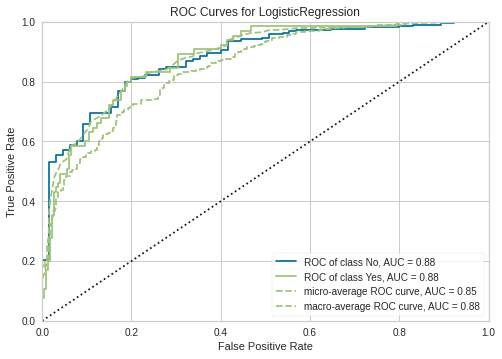

In [13]:
plot_model(tuned_lr , plot = 'auc')

### Precision-Recall Curve

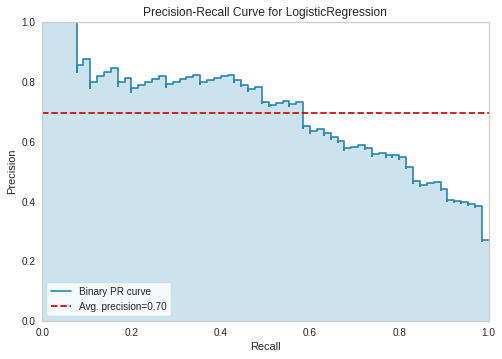

In [14]:
plot_model(tuned_lr , plot = 'pr')

### Feature Importance Plot

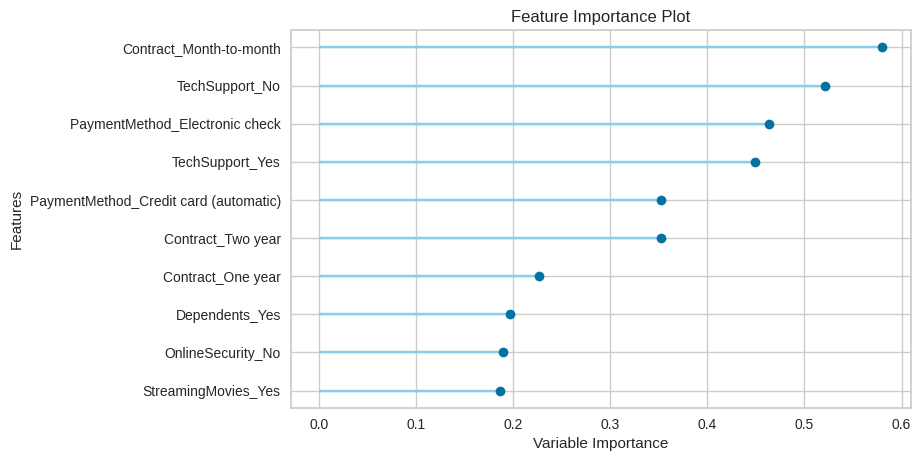

In [15]:
plot_model(tuned_lr, plot='feature')

### Confusion Matrix

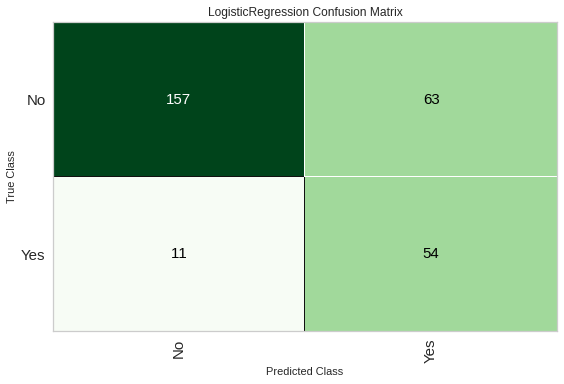

In [16]:
plot_model(tuned_lr, plot = 'confusion_matrix')

Another way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function.

In [17]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Predict on test / hold-out Sample

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. During Pycaret Setup stage, we put aside 30% (285 samples) of the data as test/hold-out set. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the `tuned_lr` variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the cross validation results.

In [18]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7404,0.8791,0.8308,0.4615,0.5934,0.4247,0.4643


The accuracy on test/hold-out set is 0.7404 compared to ~0.76 achieved on the tuned_rf cross validation results. If there is a large variation between the test/hold-out and cross validation results, then this would normally indicate over-fitting but could also be due to several other factors and would require further investigation. In this case, we will move forward with finalizing the model and predicting on unseen data (the 5% that we had separated in the beginning and never exposed to PyCaret).

## Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [19]:
final_lr = finalize_model(tuned_lr)

In [20]:
#Final linear regression model parameters for deployment
print(final_lr)

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Caution: One final word of caution. Once the model is finalized using `finalize_model()`, the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after `finalize_model()` is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use `final_lr` under `predict_model()` to compare the information grid with the prediction results on the test set.

In [40]:
predict_model(final_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.793,0.9013,0.8462,0.5288,0.6509,0.5146,0.5434


Notice how the AUC in `final_lr` has increased to 0.9013 from 0.8792, even though the model is the same. This is because the `final_lr` variable has been trained on the complete dataset including the test/hold-out set.

## Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from the previous prediction step is that this time we will pass the data_unseen parameter. data_unseen contains 5% (50 samples) of the original dataset which was never exposed to PyCaret.

In [22]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.7083,0,0,0,0,0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label,Score
0,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Yes,0.9326
1,7639-LIAYI,Male,0,No,No,52,Yes,Yes,DSL,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),79.75,4217.8,No,No,0.9420
2,0404-SWRVG,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,74.40,229.55,Yes,Yes,0.8979
3,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No,No,0.9756
4,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes,Yes,0.7666


The Label and Score columns are added onto the `data_unseen` set. 
**Label** is the prediction and **Score** is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background. You can also check the metrics on this since you have actual target column default available. To do that we will use `pycaret.utils` module. See example below:

In [23]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Churn'], unseen_predictions['Label'], metric = 'Accuracy')


0.62

### Saving the model

We have now finished the experiment by finalizing the `tuned_lr` model which is now stored in `final_lr` variable. We have also used the model stored in `final_lr` to predict `data_unseen`. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, PyCaret's inbuilt function `save_model()` allows you to save the model along with entire transformation pipeline for later use.

In [24]:
save_model(final_lr,'Final LR Model 21Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                        target_variable='Churn',
                                        threshold=0.9)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=0.056, class_

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

### Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [25]:
saved_final_lr = load_model('/content/Final LR Model 21Nov2021')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same data_unseen that we used before.

In [26]:
new_prediction = predict_model(saved_final_lr, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.7083,0,0,0,0,0


In [27]:
new_prediction.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label,Score
0,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Yes,0.9326
1,7639-LIAYI,Male,0,No,No,52,Yes,Yes,DSL,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),79.75,4217.8,No,No,0.9420
2,0404-SWRVG,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,74.40,229.55,Yes,Yes,0.8979
3,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No,No,0.9756
4,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes,Yes,0.7666


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

In [28]:
from pycaret.utils import check_metric
check_metric(new_prediction['Churn'], new_prediction['Label'], metric = 'Accuracy')

0.62

### Putting the model into a real-life context.

We can now predict if a customer will or will not churn. But how can we as a Business Owner make use of that?

Let's say, we have customer named Will. Will has been a customer for 6 months, however, our model predicts that he will churn. Now that have this insight, we should do everything we can to keep up a good customer relationship, send him emails, promotions or customer packages to keep him from churning.

And this can also be rolled out in scale. Once a company can make reliable predictions about their customer, they can make business decisions, that will increase revenue and are AI-driven.

# Your Deliverables, your time to apply the theory in practice.

Congratulations on getting to the end of this Notebook and no worries at all if you struggled with some of the theory and did not fully understand what was taught here as your actual learning starts from here.

The ideal time of reading this, is right before the Review Session, so you have a bit of time to reflect about the learning material, identify the most confusing and hard elements of a reading, and bring them to the discussion at Q&A Session with Mentor and TA. The Review Session is thus for you to close the gap in your current understanding of the material.

For your deliverables you will have to work on a separate Workbook.